In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Remove warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# Load differential expression results (DEGs)
soybean_degs = pd.read_csv("sigs_expressed_genes_soybean_14dpi.csv")
soybean_degs.head()

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,GLYMA_18G231300,1505.896302,-1.560721,0.165133,-9.451275,3.347283e-21,1.008111e-18
1,GLYMA_18G184600,1103.765881,-2.092190,0.343067,-6.098487,1.070770e-09,4.702932e-08
2,GLYMA_18G089100,14.878991,6.539420,1.965994,3.326266,8.801797e-04,6.732684e-03
3,GLYMA_18G200100,131.351419,1.814435,0.550744,3.294516,9.859123e-04,7.401635e-03
4,GLYMA_18G047800,59.554930,3.091374,0.483864,6.388925,1.670554e-10,8.922097e-09


In [5]:
# List of DEGs
# Define up and down-regulated genes
def get_regulated_genes(de_results, log2fc_threshold=1):
    up_genes = de_results[de_results['log2FoldChange'] > log2fc_threshold]['Geneid'].tolist()
    down_genes = de_results[de_results['log2FoldChange'] < -log2fc_threshold]['Geneid'].tolist()
    return up_genes, down_genes

In [6]:
up_regulated_genes, down_regulated_genes = get_regulated_genes(soybean_degs)

In [7]:
up_regulated_genes[:5]

['GLYMA_18G089100',
 'GLYMA_18G200100',
 'GLYMA_18G047800',
 'GLYMA_18G094600',
 'GLYMA_18G261300']

In [8]:
print(f"Number of up regulated genes: {len(up_regulated_genes)}")

Number of up regulated genes: 953


In [9]:
down_regulated_genes[:5]

['GLYMA_18G231300',
 'GLYMA_18G184600',
 'GLYMA_18G062000',
 'GLYMA_18G030700',
 'GLYMA_18G285700']

In [10]:
print(f"Number of down regulated genes: {len(down_regulated_genes)}")

Number of down regulated genes: 621


In [11]:
# GO Enrichment

In [12]:
from gprofiler import GProfiler

In [13]:
# Perform KEGG and GO enrichment
def soybean_enrichment(gene_list, organism='gmax', significance_threshold=0.05):
    gp = GProfiler(return_dataframe=True)
    result = gp.profile(organism=organism,
                        query=gene_list,
                        significance_threshold_method='fdr',
                        user_threshold=significance_threshold,
                        sources=['GO:BP', 'GO:MF', 'GO:CC', 'KEGG'])
    return result

In [14]:
# Convert enrichment results to DataFrame
up_enrichment = soybean_enrichment(up_regulated_genes)
down_enrichment = soybean_enrichment(down_regulated_genes)

In [15]:
up_enrichment.head(3)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0009408,response to heat,3.166708e-28,True,"""Any process that results in a change in state...",229,562,43,31857,0.076512,0.187773,query_1,"[GO:0006950, GO:0009266]"
1,GO:BP,GO:0051259,protein complex oligomerization,1.712841e-26,True,"""The process of creating protein oligomers, co...",64,562,26,31857,0.046263,0.406250,query_1,[GO:0065003]
2,GO:BP,GO:0042542,response to hydrogen peroxide,1.712841e-26,True,"""Any process that results in a change in state...",71,562,27,31857,0.048043,0.380282,query_1,[GO:0000302]


In [16]:
print(f"Significant up-regulated GO-KEGG terms: {len(up_enrichment)}")

Significant up-regulated GO-KEGG terms: 149


In [17]:
# Separate KEGG and GO results for up-regulated
sig_go_results_up = up_enrichment[up_enrichment["source"].str.contains("GO")]
sig_kegg_results_up = up_enrichment[up_enrichment["source"] == "KEGG"]

In [18]:
sig_go_results_up.head(2)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0009408,response to heat,3.166708e-28,True,"""Any process that results in a change in state...",229,562,43,31857,0.076512,0.187773,query_1,"[GO:0006950, GO:0009266]"
1,GO:BP,GO:0051259,protein complex oligomerization,1.712841e-26,True,"""The process of creating protein oligomers, co...",64,562,26,31857,0.046263,0.406250,query_1,[GO:0065003]


In [19]:
print(f"Significant up-regulated GO terms: {len(sig_go_results_up)}")

Significant up-regulated GO terms: 149


In [20]:
sig_kegg_results_up.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents


In [21]:
print(f"Significant up-regulated KEGG terms: {len(sig_kegg_results_up)}")

Significant up-regulated KEGG terms: 0


In [22]:
down_enrichment.head(3)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0009522,photosystem I,2.870889e-21,True,"""A photosystem that contains an iron-sulfur re...",76,380,21,33182,0.055263,0.276316,query_1,[GO:0009521]
1,GO:BP,GO:0009768,"photosynthesis, light harvesting in photosystem I",6.369240e-20,True,"""After a photon of light is absorbed by one of...",39,385,17,31857,0.044156,0.435897,query_1,[GO:0009765]
2,GO:CC,GO:0031976,plastid thylakoid,1.288121e-19,True,"""Any thylakoid within a plastid."" [GOC:pz]",378,380,35,33182,0.092105,0.092593,query_1,"[GO:0009536, GO:0009579]"


In [23]:
print(f"Significant down-regulated GO KEGG terms: {len(down_enrichment)}")

Significant down-regulated GO KEGG terms: 153


In [24]:
# Separate KEGG and GO results for down-regulated
sig_go_results_down = down_enrichment[down_enrichment["source"].str.contains("GO")]
sig_kegg_results_down = down_enrichment[down_enrichment["source"] == "KEGG"]

In [25]:
sig_go_results_down.head(2)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0009522,photosystem I,2.870889e-21,True,"""A photosystem that contains an iron-sulfur re...",76,380,21,33182,0.055263,0.276316,query_1,[GO:0009521]
1,GO:BP,GO:0009768,"photosynthesis, light harvesting in photosystem I",6.369240e-20,True,"""After a photon of light is absorbed by one of...",39,385,17,31857,0.044156,0.435897,query_1,[GO:0009765]


In [26]:
print(f"Significant down-regulated GO terms: {len(sig_go_results_down)}")

Significant down-regulated GO terms: 153


In [27]:
sig_kegg_results_down.head(2)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents


In [28]:
print(f"Significant down-regulated KEGG terms: {len(sig_kegg_results_down)}")

Significant down-regulated KEGG terms: 0


In [29]:
# Save results

sig_go_results_up.to_csv("GO_enrichment_up_regulated_soybean_14dpi.csv", index=False)
sig_go_results_down.to_csv("GO_enrichment_down_regulated_soybean_14dpi.csv", index=False)

In [30]:
# GO Enrichment Visualization
# Up_regulated genes

In [31]:
import textwrap
import matplotlib.patches as mpatches

In [32]:
# Load GO enrichment data for up_regulated genes
file_path = "GO_enrichment_up_regulated_soybean_14dpi.csv"
df = pd.read_csv(file_path)

In [33]:
df.head(3)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0009408,response to heat,3.166708e-28,True,"""Any process that results in a change in state...",229,562,43,31857,0.076512,0.187773,query_1,"['GO:0006950', 'GO:0009266']"
1,GO:BP,GO:0051259,protein complex oligomerization,1.712841e-26,True,"""The process of creating protein oligomers, co...",64,562,26,31857,0.046263,0.406250,query_1,['GO:0065003']
2,GO:BP,GO:0042542,response to hydrogen peroxide,1.712841e-26,True,"""Any process that results in a change in state...",71,562,27,31857,0.048043,0.380282,query_1,['GO:0000302']


In [34]:
# Convert p-values and compute -log10(p-value)
df['-log10(p-value)'] = -np.log10(df['p_value'].astype(float))

In [35]:
# Define GO categories and colors
category_colors = {
    'GO:BP': 'red',    # Biological Process
    'GO:MF': 'green',  # Molecular Function
    'GO:CC': 'blue'    # Cellular Component
}

In [36]:
# Assign colors based on category
df['color'] = df['source'].map(category_colors)

In [37]:
# Get top 10 for each category (BP, CC, MF)
top_bp = df[df['source'] == 'GO:BP'].nlargest(10, '-log10(p-value)')
top_cc = df[df['source'] == 'GO:CC'].nlargest(10, '-log10(p-value)')
top_mf = df[df['source'] == 'GO:MF'].nlargest(10, '-log10(p-value)')

In [38]:
# Combine top GO terms from each category
df_top = pd.concat([top_bp, top_cc, top_mf])

In [39]:
df_top.head(2)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,-log10(p-value),color
0,GO:BP,GO:0009408,response to heat,3.166708e-28,True,"""Any process that results in a change in state...",229,562,43,31857,0.076512,0.187773,query_1,"['GO:0006950', 'GO:0009266']",27.499392,red
1,GO:BP,GO:0051259,protein complex oligomerization,1.712841e-26,True,"""The process of creating protein oligomers, co...",64,562,26,31857,0.046263,0.406250,query_1,['GO:0065003'],25.766283,red


In [40]:
# Wrap long text labels (GO term names)
df_top['name'] = df_top['name'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=65)))

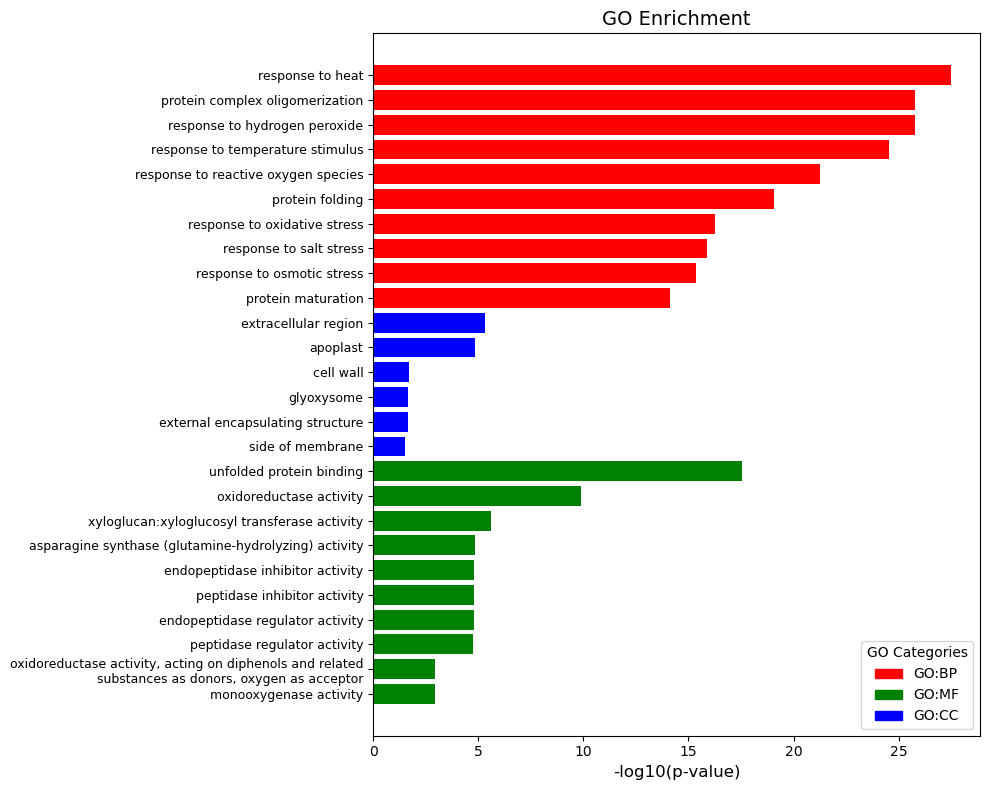

In [41]:
# Plot settings
plt.figure(figsize=(10, 8))
y_pos = np.arange(len(df_top))

# Create bar plot
plt.barh(y_pos, df_top['-log10(p-value)'], color=df_top['color'], align='center')

# Labels and formatting
plt.yticks(y_pos, df_top['name'], fontsize=9)
plt.xlabel('-log10(p-value)', fontsize=12)
plt.title('GO Enrichment', fontsize=14)
plt.gca().invert_yaxis()

# Add legend
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items()]
plt.legend(handles=legend_patches, title="GO Categories")

# Save and show
plt.tight_layout()
plt.savefig("go_enrichment_up_regulated_14dpi.png", dpi=600)
plt.show()

In [42]:
# GO Enrichment Visualization
# Down_regulated genes

In [44]:
# Load GO enrichment data for down_regulated genes
file_path = "GO_enrichment_down_regulated_soybean_14dpi.csv"
data = pd.read_csv(file_path)

In [45]:
data.head(2)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0009522,photosystem I,2.870889e-21,True,"""A photosystem that contains an iron-sulfur re...",76,380,21,33182,0.055263,0.276316,query_1,['GO:0009521']
1,GO:BP,GO:0009768,"photosynthesis, light harvesting in photosystem I",6.369240e-20,True,"""After a photon of light is absorbed by one of...",39,385,17,31857,0.044156,0.435897,query_1,['GO:0009765']


In [46]:
# Convert p-values and compute -log10(p-value)
data['-log10(p-value)'] = -np.log10(data['p_value'].astype(float))

In [47]:
# Define GO categories and colors
category_colors = {
    'GO:BP': 'red',    # Biological Process
    'GO:MF': 'green',  # Molecular Function
    'GO:CC': 'blue'    # Cellular Component
}

In [48]:
# Assign colors based on category
data['color'] = data['source'].map(category_colors)

In [49]:
# Get top 10 for each category (BP, CC, MF)
top_bp = data[data['source'] == 'GO:BP'].nlargest(10, '-log10(p-value)')
top_cc = data[data['source'] == 'GO:CC'].nlargest(10, '-log10(p-value)')
top_mf = data[data['source'] == 'GO:MF'].nlargest(10, '-log10(p-value)')

In [50]:
# Combine top GO terms from each category
data_top = pd.concat([top_bp, top_cc, top_mf])

In [51]:
data_top.head(2)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,-log10(p-value),color
1,GO:BP,GO:0009768,"photosynthesis, light harvesting in photosystem I",6.369240e-20,True,"""After a photon of light is absorbed by one of...",39,385,17,31857,0.044156,0.435897,query_1,['GO:0009765'],19.195912,red
13,GO:BP,GO:0009765,"photosynthesis, light harvesting",1.919478e-16,True,"""Absorption and transfer of the energy absorbe...",60,385,17,31857,0.044156,0.283333,query_1,"['GO:0006091', 'GO:0019684']",15.716817,red


In [56]:
# Wrap long text labels (GO term names)
data_top['name'] = data_top['name'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=65)))

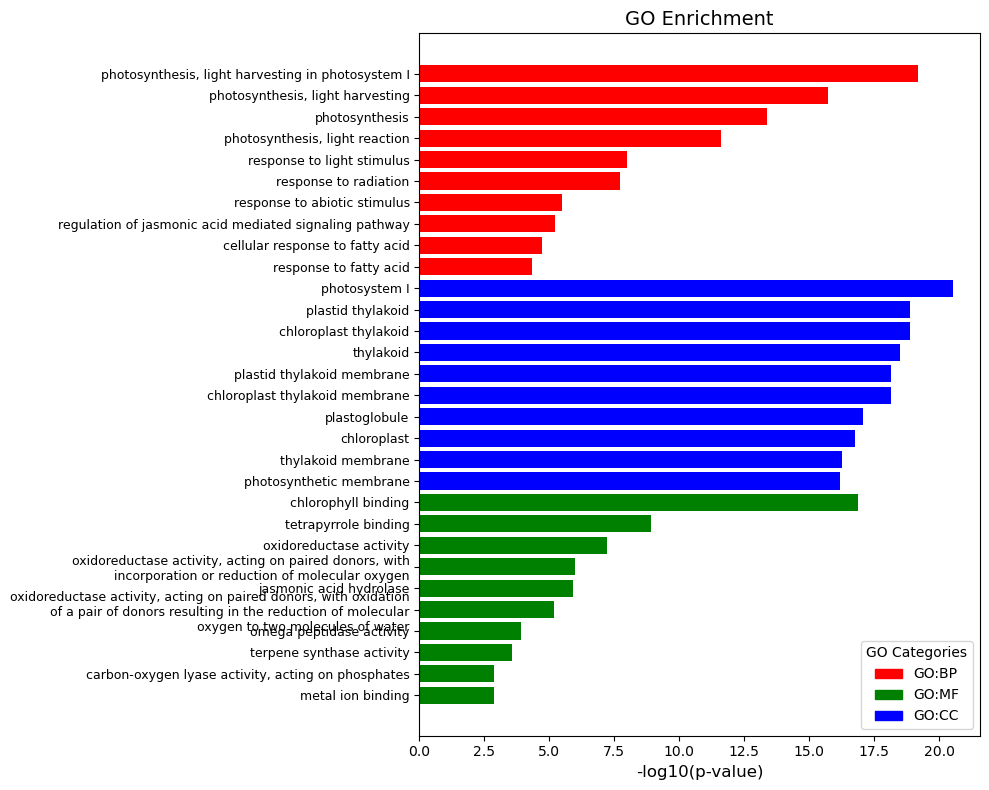

In [57]:
# Plot settings
plt.figure(figsize=(10, 8))
y_pos = np.arange(len(data_top))

# Create bar plot
plt.barh(y_pos, data_top['-log10(p-value)'], color=data_top['color'], align='center')

# Labels and formatting
plt.yticks(y_pos, data_top['name'], fontsize=9)
plt.xlabel('-log10(p-value)', fontsize=12)
plt.title('GO Enrichment', fontsize=14)
plt.gca().invert_yaxis()

# Add legend
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items()]
plt.legend(handles=legend_patches, title="GO Categories")

# Save and show
plt.tight_layout()
plt.savefig("go_enrichment_down_regulated_14dpi.png", dpi=600)
plt.show()